In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [156]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [157]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<b>Preprocessing of the data</b>

In [158]:
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)
# Convert categorical variable into dummy/indicator variables.
from sklearn.preprocessing import LabelEncoder
categorical_cols = data.select_dtypes(include='object').columns
for column in categorical_cols:
    data[column] = LabelEncoder().fit_transform(data[column])
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [159]:
# Split into input features and target variable
x = data.drop('Revenue', axis=1)
y = data['Revenue']

In [160]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(9864, 17) (2466, 17)


In [161]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
x_test

array([[-0.69847163, -0.45368339, -0.39210741, ..., -0.51600481,
         0.40876645, -0.5554907 ],
       [ 4.12141325,  0.5538552 ,  0.38941361, ..., -0.76368712,
         0.40876645, -0.5554907 ],
       [ 2.01271362,  0.58735164, -0.39210741, ..., -0.51600481,
         0.40876645,  1.80021017],
       ...,
       [ 1.1089852 ,  1.09201465,  1.17093462, ..., -0.51600481,
        -2.48160793,  1.80021017],
       [-0.39722883, -0.08840417,  0.38941361, ..., -0.76368712,
         0.40876645, -0.5554907 ],
       [-0.09598602, -0.33657097, -0.39210741, ..., -0.51600481,
        -2.48160793, -0.5554907 ]], shape=(2466, 17))

<b>Algorithm Implementation using Python Library Scikit-learn</b>

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [163]:
#K-Nearest Neighbour (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)
accuracy_knn = knn.score(x_test, y_test)
print(predict_knn)
print(f'Accuracy in KNN Algorithm: {accuracy_knn}')

[0 0 0 ... 0 0 1]
Accuracy in KNN Algorithm: 0.8657745336577454


In [164]:
#Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_test)
accuracy_lr = lr.score(x_test, y_test)
print(predict_lr)
print(f'Accuracy in Logistic Regression Algorithm: {accuracy_lr}')

[0 0 0 ... 0 0 1]
Accuracy in Logistic Regression Algorithm: 0.870235198702352


In [165]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predict_rf = rf.predict(x_test)
accuracy_rf = rf.score(x_test, y_test)
print(predict_rf)
print(f'Accuracy in Random Forest Algorithm: {accuracy_rf}')

[0 0 0 ... 0 0 1]
Accuracy in Random Forest Algorithm: 0.894566098945661


In [166]:
#Gradient Boost
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predict_gb = gb.predict(x_test)
accuracy_gb = gb.score(x_test, y_test)
print(predict_gb)
print(f'Accuracy in Gradient Boost Algorithm: {accuracy_gb}')

[0 0 0 ... 0 0 1]
Accuracy in Gradient Boost Algorithm: 0.8876723438767234


In [167]:
#AdaBoost
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)
predict_ab = ab.predict(x_test)
accuracy_ab = ab.score(x_test, y_test)
print(predict_ab)
print(f'Accuracy in AdaBoost Algorithm: {accuracy_ab}')

[0 0 0 ... 0 0 1]
Accuracy in AdaBoost Algorithm: 0.8856447688564477


In [168]:
#Support Vector Machine (SVM)
svc = SVC(probability=True)
svc.fit(x_train, y_train)
predict_svm = svc.predict(x_test)
accuracy_svm = svc.score(x_test, y_test)
print(predict_svm)
print(f'Accuracy in SVM Algorithm: {accuracy_svm}')

[0 0 0 ... 0 0 1]
Accuracy in SVM Algorithm: 0.8807785888077859


In [169]:
Algoacc = pd.DataFrame()
Algoacc['Algorithm'] = list(['KNN', 'Logistic Regression', 'Random Forest', 'Gradient Boost', 'AdaBoost', 'SVM'])
Algoacc['Accuracy'] = list(100*np.array([accuracy_knn, accuracy_lr, accuracy_rf, accuracy_gb, accuracy_ab, accuracy_svm]))

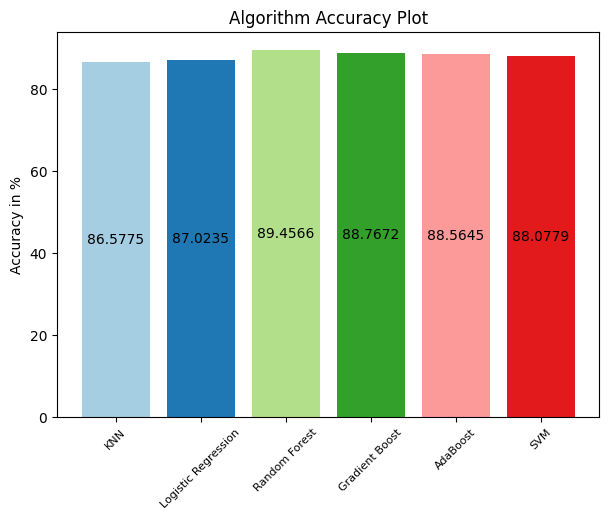

In [186]:
#Plot to compare accuracy
plt.figure(figsize=(7,5))
plt.bar(Algoacc['Algorithm'], Algoacc['Accuracy'], color=plt.cm.Paired.colors[:len(Algoacc['Accuracy'])])
plt.title('Algorithm Accuracy Plot')
plt.ylabel('Accuracy in %')
plt.xticks(rotation=45, fontsize=8)
for i, value in enumerate(Algoacc['Accuracy']):
    plt.text(i, value / 2, f"{value:.4f}", ha='center', va='center', fontsize=10, color='black')
plt.show()

In [171]:
max = 0
for i in range(len(Algoacc['Accuracy'])):
    if Algoacc['Accuracy'].iloc[i] > Algoacc['Accuracy'].iloc[max]:
        max = i
print(f'Algorith with highest accuracy is {Algoacc['Algorithm'].iloc[max]} with an accuracy of {Algoacc['Accuracy'].iloc[max]}')

Algorith with highest accuracy is Random Forest with an accuracy of 89.4566098945661


(16675, 17) (4169, 17)


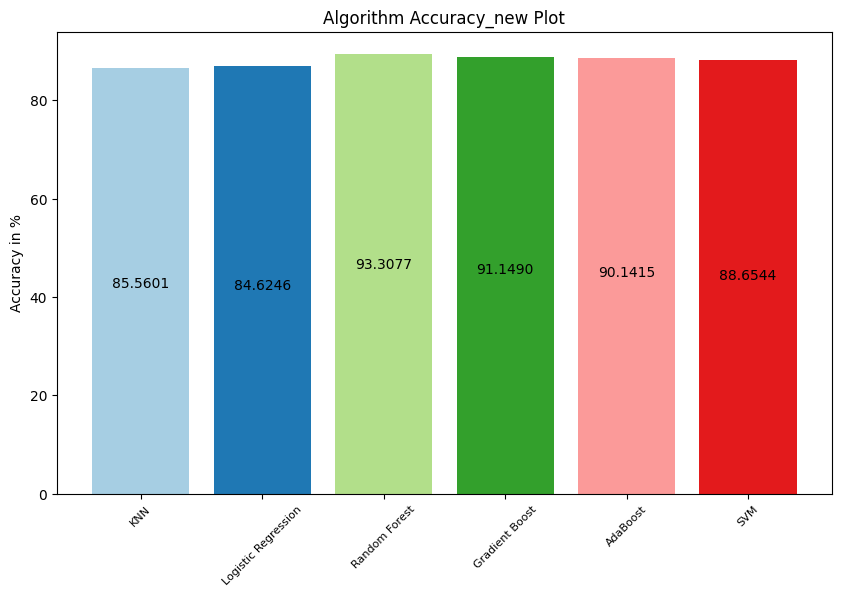

Algorith with new highest accuracy is Random Forest with an accuracy of 93.30774766130968


In [189]:
#Inherent Class Imbalance is present
#Using smote to generate synethtic data points for more better decision boundary
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_new, y_new = smote.fit_resample(x, y)
#Split into test and training data
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=0)
print(x_train_new.shape, x_test_new.shape)
#Feature Scaling
scalar = StandardScaler()
x_train_new = scalar.fit_transform(x_train_new)
x_test_new = scalar.transform(x_test_new)
#Algorithm Implementation
#K-Nearest Neighbour (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train_new,y_train_new)
accuracy_knn_new = knn.score(x_test_new, y_test_new)
#Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train_new, y_train_new)
accuracy_lr_new = lr.score(x_test_new, y_test_new)
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train_new,y_train_new)
accuracy_rf_new = rf.score(x_test_new, y_test_new)
#Gradient Boost
gb = GradientBoostingClassifier()
gb.fit(x_train_new,y_train_new)
accuracy_gb_new = gb.score(x_test_new, y_test_new)
#AdaBoost
ab = AdaBoostClassifier()
ab.fit(x_train_new,y_train_new)
accuracy_ab_new = ab.score(x_test_new, y_test_new)
#Support Vector Machine (SVM)
svc = SVC(probability=True)
svc.fit(x_train_new,y_train_new)
accuracy_svm_new = svc.score(x_test_new, y_test_new)


Algoacc['Accuracy_new'] = list(100*np.array([accuracy_knn_new, accuracy_lr_new, accuracy_rf_new, accuracy_gb_new, accuracy_ab_new, accuracy_svm_new]))

#Plot to compare new accuracy
plt.figure(figsize=(10, 6))
plt.bar(Algoacc['Algorithm'], Algoacc['Accuracy'], color=plt.cm.Paired.colors[:len(Algoacc['Accuracy'])])
plt.title('Algorithm Accuracy_new Plot')
plt.ylabel('Accuracy in %')
plt.xticks(rotation=45, fontsize=8)
for i, value in enumerate(Algoacc['Accuracy_new']):
    plt.text(i, value / 2, f"{value:.4f}", ha='center', va='center', fontsize=10, color='black')
plt.show()
max = 0
for i in range(len(Algoacc['Accuracy'])):
    if Algoacc['Accuracy_new'].iloc[i] > Algoacc['Accuracy_new'].iloc[max]:
        max = i
print(f'Algorith with new highest accuracy is {Algoacc['Algorithm'].iloc[max]} with an accuracy of {Algoacc['Accuracy_new'].iloc[max]}')